In [1]:
import os
import numpy as np

def read_directories(directory, img=None, exclude_json=None):
    # Get a list of filenames in the specified directory
    filenames = []
    for filename in os.listdir(directory):
        if img is not None:
            # If 'img' is provided, filter filenames containing it
            if img in filename:   
                filenames.append(filename)
        elif exclude_json is not None:
            filenames.append(filename.replace('.json',''))     
        else:
            filenames.append(filename)    
    return filenames


def add_salt_and_pepper_noise(image, salt_prob=0.01, pepper_prob=0.01):   
    """
    Adds salt and pepper noise to an image.

    Parameters:
    - image: input image (numpy array).
    - salt_prob: probability of salt pixels (white).
    - pepper_prob: probability of pepper pixels (black).

    Returns:
    - Image with salt and pepper noise.
    """
    
    row, col = image.shape
    noisy = np.copy(image)

    # Adds salt noise
    salt_pixels = np.random.rand(row, col) < salt_prob
    noisy[salt_pixels] = 255

    # Adds pepper noise
    pepper_pixels = np.random.rand(row, col) < pepper_prob
    noisy[pepper_pixels] = 0

    return noisy.astype(np.uint8)


In [2]:

from skimage.io import imread
import numpy as np
import cv2
import random
import matplotlib.pyplot as plt
from bm3d import bm3d, BM3DProfile
from skimage.metrics import peak_signal_noise_ratio, structural_similarity
import skimage
from skimage.color import rgb2gray
from skimage.restoration import estimate_sigma

from pathlib import Path
import sys
# sys.path.insert(0, r"c:/Users/adria/Documents\Doutorado/ProjetoDoutorado")
# root_dir = Path(r"c:/Users/adria/Documents/Doutorado/ProjetoDoutorado")

sys.path.insert(0, r"/home/adrianocarvalho/Documentos/ProjetoDoutorado")
root_dir = Path(r"/home/adrianocarvalho/Documentos/ProjetoDoutorado")


dir_images = f'{root_dir}/wvc/images'
dir_out_bm3d = f'{root_dir}/wvc/512x512/out_put_BM3D_Salt'

array_dir = read_directories(dir_images)

array_dicts = []

for file in array_dir:
    file_name = file
    
    # Carrega imagem e converte
    img = imread(f'{dir_images}/{file}', as_gray=False)

    # Remove frames extras, se existirem (e.g. GIF com shape (1, H, W) ou (N, H, W, 3))
    if img.ndim == 4:
        img = img[0]
    elif img.ndim == 3 and img.shape[2] != 3:
        img = np.squeeze(img)

    # Converte para escala de cinza, se necessário
    if img.ndim == 3 and img.shape[2] == 3:
        img_gray = rgb2gray(img)  # retorna float64 em [0, 1]
    else:
        img_gray = img.astype(np.float32) / 255.0  # já está em cinza

    # Agora está garantidamente em escala de cinza float [0,1]
    img_gray = np.clip(img_gray * 255, 0, 255).astype(np.uint8)

    ruidosa = add_salt_and_pepper_noise(img_gray)

    ruidosa[np.where(ruidosa > 255)] = 255
    ruidosa[np.where(ruidosa < 0)] = 0

    # 1. Normaliza a imagem ruidosa para intervalo [0, 1]
    ruidosa_normalizada = ruidosa.astype(np.float32) / 255.0

    sigma_est = estimate_sigma(ruidosa_normalizada, channel_axis=None)

    # 3. Define o perfil padrão do BM3D
    perfil_bm3d = BM3DProfile()

    # 4. Aplica o BM3D com os argumentos definidos
    denoised = bm3d(
        ruidosa_normalizada,
        sigma_psd=sigma_est,
        profile=perfil_bm3d
    )
    denoised_sq = np.squeeze(denoised)

    skimage.io.imsave(f'{dir_out_bm3d}/{file_name}', np.clip(denoised_sq * 255, 0, 255).astype(np.uint8))

    psnr = peak_signal_noise_ratio(img_gray, (denoised * 255).astype(np.uint8))
    ssim = structural_similarity(img_gray, (denoised * 255).astype(np.uint8))

    print(f"PSNR: {psnr:.2f} dB")
    print(f"SSIM: {ssim:.4f}")

    dict = {
            'ssim': ssim,
            'psnr':psnr,        
            'image': file_name   
        }
    array_dicts.append(dict)
    

PSNR: 22.82 dB
SSIM: 0.5958
PSNR: 22.22 dB
SSIM: 0.7012
PSNR: 22.68 dB
SSIM: 0.6227
PSNR: 19.83 dB
SSIM: 0.6656
PSNR: 22.15 dB
SSIM: 0.7259
PSNR: 21.49 dB
SSIM: 0.7152
PSNR: 22.08 dB
SSIM: 0.6281
PSNR: 22.74 dB
SSIM: 0.5906
PSNR: 22.01 dB
SSIM: 0.6627
PSNR: 21.93 dB
SSIM: 0.7078
PSNR: 22.47 dB
SSIM: 0.5931
PSNR: 23.11 dB
SSIM: 0.7382
PSNR: 22.15 dB
SSIM: 0.6669
PSNR: 22.27 dB
SSIM: 0.5428
PSNR: 22.96 dB
SSIM: 0.6307
PSNR: 22.37 dB
SSIM: 0.7107
PSNR: 22.50 dB
SSIM: 0.7592
PSNR: 22.69 dB
SSIM: 0.6503
PSNR: 22.45 dB
SSIM: 0.6247
PSNR: 21.90 dB
SSIM: 0.6691
PSNR: 22.83 dB
SSIM: 0.6525
PSNR: 22.04 dB
SSIM: 0.6248
PSNR: 22.18 dB
SSIM: 0.5699
PSNR: 22.64 dB
SSIM: 0.5901
PSNR: 22.25 dB
SSIM: 0.7351
PSNR: 22.55 dB
SSIM: 0.6431
PSNR: 22.44 dB
SSIM: 0.6740
PSNR: 22.35 dB
SSIM: 0.6272
PSNR: 21.95 dB
SSIM: 0.7315
PSNR: 18.04 dB
SSIM: 0.7259
PSNR: 22.69 dB
SSIM: 0.6379
PSNR: 22.45 dB
SSIM: 0.6250
PSNR: 22.89 dB
SSIM: 0.5613
PSNR: 21.90 dB
SSIM: 0.6063
PSNR: 21.54 dB
SSIM: 0.6746
PSNR: 22.29 dB
SSIM:

In [4]:
import pandas as pd
import numpy as np

def salvar_resultados_em_xlsx(lista_dicionarios, caminho_arquivo='resultados.xlsx'):
    # Converte os dicionários para DataFrame
    df = pd.DataFrame(lista_dicionarios)
    
    # Converte todos os np.float64 para float padrão do Python
    df = df.applymap(lambda x: float(x) if isinstance(x, np.float64) else x)
    
    # Salva como arquivo Excel
    df.to_excel(caminho_arquivo, index=False)
    print(f'Arquivo salvo em: {caminho_arquivo}')

In [6]:
salvar_resultados_em_xlsx(array_dicts, 'saida_Salt_512x512_BM3D.xlsx')

Arquivo salvo em: saida_Salt_512x512_BM3D.xlsx


/tmp/ipykernel_1515524/1866010612.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: float(x) if isinstance(x, np.float64) else x)


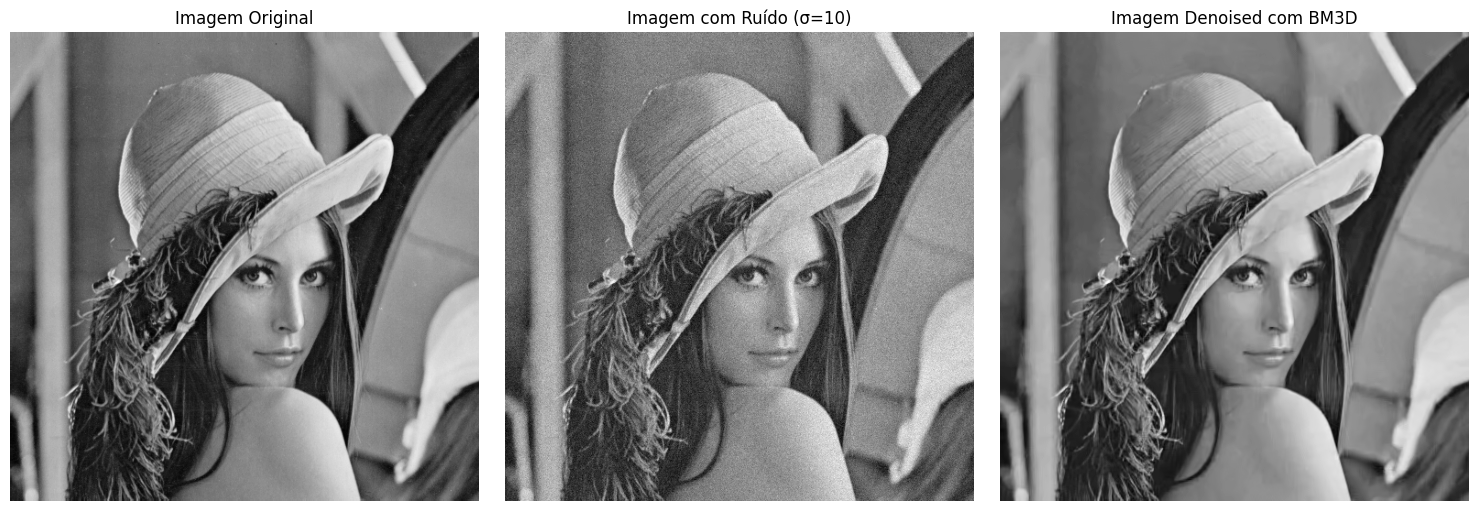

PSNR: 35.59 dB
SSIM: 0.9177


In [ ]:

# Carrega imagem e converte
img_gray = imread('wvc/images/0.gif', as_gray=True)
img_gray = (img_gray * 255).astype(np.uint8)
img_gray = np.squeeze(img_gray)

# Adiciona ruído
sigma = 10
ruido = np.random.normal(0, sigma, img_gray.shape)
ruidosa = np.clip(img_gray.astype(np.float32) + ruido, 0, 255).astype(np.uint8)

# 1. Normaliza a imagem ruidosa para intervalo [0, 1]
ruidosa_normalizada = ruidosa.astype(np.float32) / 255.0

# 2. Normaliza o desvio padrão do ruído
sigma_normalizado = sigma / 255.0

# 3. Define o perfil padrão do BM3D
perfil_bm3d = BM3DProfile()

# 4. Aplica o BM3D com os argumentos definidos
denoised = bm3d(
    ruidosa_normalizada,
    sigma_psd=sigma_normalizado,
    profile=perfil_bm3d
)
# Exibe os resultados
# plt.figure(figsize=(15, 5))
# plt.subplot(1, 3, 1)
# plt.imshow(img_gray, cmap='gray')
# plt.title("Imagem Original")
# plt.axis('off')

# plt.subplot(1, 3, 2)
# plt.imshow(ruidosa, cmap='gray')
# plt.title(f"Imagem com Ruído (σ={sigma})")
# plt.axis('off')

# plt.subplot(1, 3, 3)
# plt.imshow(denoised, cmap='gray')
# plt.title("Imagem Denoised com BM3D")
# plt.axis('off')

# plt.tight_layout()
# plt.show()

psnr = peak_signal_noise_ratio(img_gray, (denoised * 255).astype(np.uint8))
ssim = structural_similarity(img_gray, (denoised * 255).astype(np.uint8))

print(f"PSNR: {psnr:.2f} dB")
print(f"SSIM: {ssim:.4f}")

dict = {
        'ssim': ssim,
        'psnr':psnr
      
        'image': file_name   
    }
array_dicts.append(dict)


In [3]:
img_gray

array([[162, 162, 162, ..., 170, 155, 128],
       [162, 162, 162, ..., 170, 155, 128],
       [162, 162, 162, ..., 170, 155, 128],
       ...,
       [ 43,  43,  49, ..., 104,  99,  97],
       [ 44,  44,  55, ..., 104, 104, 107],
       [ 44,  44,  55, ..., 104, 104, 107]], dtype=uint8)